## Trabajo Regresion lineal
##  William David Arias amaya
##  1. Realizar un análisis exploratorio de los datos para identificar
## relaciones entre variables, valores atípicos, tendencias, etc.
##  2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
## 5. Entrenar el modelo configurando los diferentes hiperparámetros.
## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
## 8. Interpretar, analizar y documentar los resultados obtenidos.¶

In [15]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [28]:
# librerias:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# librearias para implementar modelis de ciencia de datos 

from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix




In [98]:
# Cargue de datos para lectura:

dbAutos= pd.read_csv('C:/Tarea_3_An/Data_car/Cardetailsv3.CSV')

In [100]:
# LECTURA DE DATOS PARA REALIZAR ANALISIS:

dbAutos.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [104]:
print(dbAutos.info())
print(dbAutos.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner            

In [106]:
dbAutos.dropna(inplace=True)

In [108]:
# Convertir variables categóricas a numéricas
dbAutos = pd.get_dummies(dbAutos, drop_first=True)

In [110]:
# Seleccionar las características
X = dbAutos.drop('selling_price', axis=1)
y = dbAutos['selling_price']

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3.2866726795391562e+22
R^2 Score: -47271003142.68337


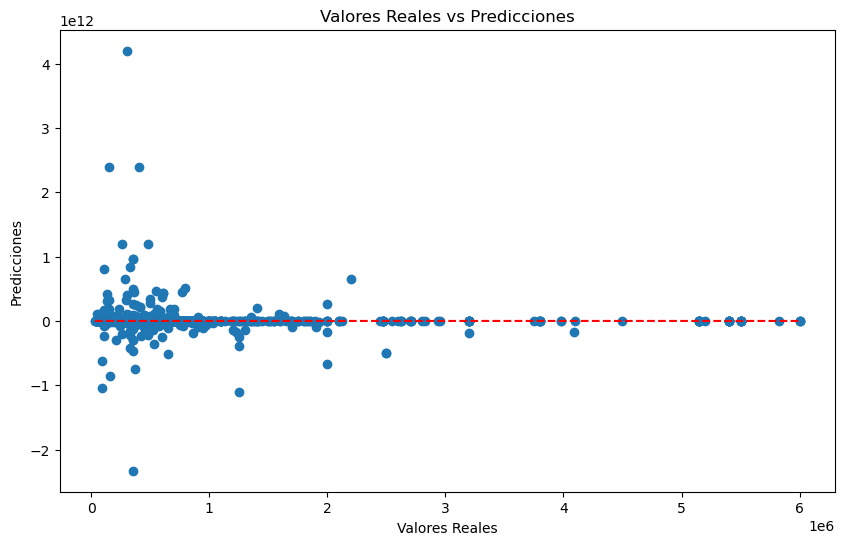

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comparar valores reales vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [142]:
data1={
    'Modelo': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
    'Precio': [450000,370000,158000,225000,130000,440000,96000,45000,350000,200000,500000,92000,280000,200000,180000,400000,778000,500000,150000,680000]
}

Intercepto (ß0): [204000.]
Coeficiente (Tamaño, ß1): [[11284.21052632]]


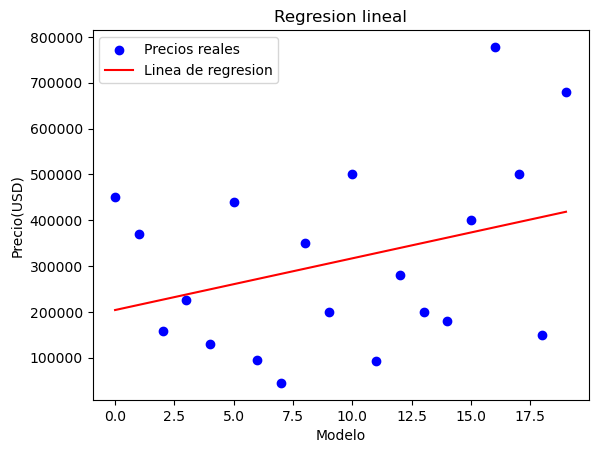

In [160]:
df= pd.DataFrame(data1)
# variables segun número de modelo respecto a precio:

x= df[['Modelo']]
y= df[['Precio']]
modelo = LinearRegression()
modelo.fit(x,y)
beta_0 = modelo.intercept_
beta_1 =modelo.coef_
print(f"Intercepto (ß0): {beta_0}")
print(f"Coeficiente (Tamaño, ß1): {beta_1}")


plt.scatter(df['Modelo'],y, color='blue', label='Precios reales')
plt.plot(df['Modelo'], modelo.predict(x), color='red', label= 'Linea de regresion')
plt.title('Regresion lineal')
plt.xlabel('Modelo')
plt.ylabel('Precio(USD)')
plt.legend()
plt.show()
